In [1]:
#Importation des librairies

import pandas as pd
import numpy as np



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns
sns.set()

from sklearn import decomposition
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


import warnings
warnings.simplefilter("ignore")

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
# Upload du fichier csv
df_final=pd.read_csv(r'C:\Users\franc\Desktop\DATA\PROJET 9 Produisez une étude de marché avec R ou Python\df_final_P9.csv', decimal=".", index_col=0)

In [3]:
# Affichage du dataframe
df_final.head()

,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
Afghanistan,"36,296,113.00","18,896.35",-2.80,57.00,133.11,29.00,55.00,28.00
Afrique du Sud,"57,009,756.00","349,006.69",-0.28,"2,118.00",63.00,514.00,"2,035.00","1,667.00"
Albanie,"2,884,169.00","13,019.73",0.38,47.00,0.00,38.00,47.00,13.00
Algérie,"41,389,189.00","170,096.98",-0.92,277.00,0.00,2.00,264.00,275.00
Allemagne,"82,658,409.00","3,690,849.15",0.59,"1,739.00",646.00,842.00,"1,609.00","1,514.00"


In [4]:
#Affichage du type des variables
df_final.dtypes

Population                  float64
PIB $ en million            float64
indice stabilite            float64
Disponibilité intérieure    float64
Exportations - Quantité     float64
Importations - Quantité     float64
Nourriture                  float64
Production                  float64
dtype: object

# Analyse en composantes principales

L'ACP permet de:
- réduire la dimension de nos données tout en conservant l'information. 
- mettre en lumière les corrélations entre les variables et les regrouper en de nouvelles variables synthétiques
- comprendre le profil des pays

In [5]:
#On convertit les données en array numpy
X = df_final.values
X

array([[ 3.62961130e+07,  1.88963520e+04, -2.80000000e+00, ...,
         2.90000000e+01,  5.50000000e+01,  2.80000000e+01],
       [ 5.70097560e+07,  3.49006690e+05, -2.80000000e-01, ...,
         5.14000000e+02,  2.03500000e+03,  1.66700000e+03],
       [ 2.88416900e+06,  1.30197299e+04,  3.80000000e-01, ...,
         3.80000000e+01,  4.70000000e+01,  1.30000000e+01],
       ...,
       [ 2.78348190e+07,  2.07393806e+04, -2.94000000e+00, ...,
         7.80000000e+01,  2.37000000e+02,  1.68000000e+02],
       [ 1.68535990e+07,  2.58681615e+04,  1.50000000e-01, ...,
         1.20000000e+01,  5.80000000e+01,  4.90000000e+01],
       [ 1.42365950e+07,  2.20409023e+04, -7.10000000e-01, ...,
         6.00000000e+00,  6.70000000e+01,  6.90000000e+01]])

In [6]:
# Affichage de la taille des données
X.shape

(164, 8)

In [7]:
#on enregistre le noms des pays dans la variable pays
pays=df_final.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Venezuela (République bolivarienne du)', 'Viet Nam', 'Yémen', 'Zambie',
       'Zimbabwe'],
      dtype='object', name='Zone', length=164)

In [8]:
#on enregistre le noms des features dans la variable features
features=df_final.columns
features

Index(['Population', 'PIB $ en million', 'indice stabilite',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production'],
      dtype='object')

## Scaling des données 


Le scaling de données permet de mettre les données sur la même échelle

In [9]:
#Création d'un standardiser
scaler = StandardScaler()

In [10]:
#On fit (ou adapte) nos données et on les transforme
X_scaled = scaler.fit_transform(X)

In [11]:
#On veut une moyenne =0 et un écart type=1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## ACP

In [12]:
#On ne travaille que sur les 8 premières composantes (car nous avons 8 variables)
n_components = 8

In [13]:
#on instancie l'ACP
pca = PCA(n_components=n_components)

In [14]:
#on l'entraine sur les données scalées 
pca.fit(X_scaled)

PCA(n_components=8)

### Variance 

On s'intéresse à la variance captée par chaque nouvelle composante. Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

In [15]:
#Calcul pour comprendre la ratio de la variance
print(pca.explained_variance_ratio_*100)
print('la 1ere composante capte 54.93% de la variance" des données initiales, \n la seconde composante capte 17.97% et la 3e 11.02%')

[54.93733318 17.97273431 11.02269029  7.59626396  5.09640843  3.07296255
  0.22429495  0.07731233]
la 1ere composante capte 54.93% de la variance" des données initiales, 
 la seconde composante capte 17.97% et la 3e 11.02%


In [16]:
#On initialise la variable scree comprenant les ratios de la variance
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
print("Les 3 premières composantes captent 83.9% de la variance")

[54.94 17.97 11.02  7.6   5.1   3.07  0.22  0.08]
Les 3 premières composantes captent 83.9% de la variance


In [17]:
#Calcul de la somme cumulée de la variance
scree_cum = scree.cumsum().round()
print(scree_cum)


[ 55.  73.  84.  92.  97. 100. 100. 100.]


Les deux premières composantes captent 73% de l'information

In [18]:
#Initialisation d'une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

### Scree plot

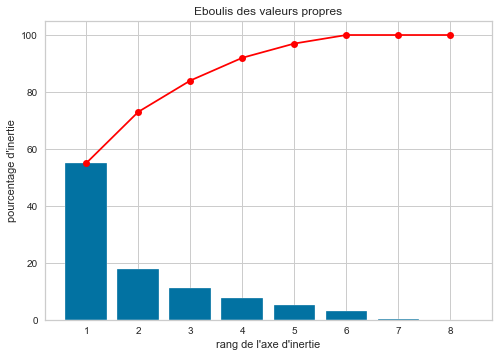

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée. 
 En réduisant le nombre de dimension à 2 dimensions on capte 73% de'linformation et avec 3 dimensions 84% de la variance est concentrée dans les 3 premières composantes


In [19]:
#Scree plot 
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
print("On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée. \n En réduisant le nombre de dimension à 2 dimensions on capte 73% de'linformation et avec 3 dimensions 84% de la variance est concentrée dans les 3 premières composantes")

## Calcul des Composantes

In [20]:
#Calcul des composantes 
pcs = pca.components_
pcs


array([[ 0.34892523,  0.37067049, -0.0711793 ,  0.45545536,  0.1510304 ,
         0.31732433,  0.45571476,  0.44403563],
       [-0.37225346,  0.29680168,  0.66121493, -0.09736264,  0.41051652,
         0.38125015, -0.08687597, -0.07230863],
       [ 0.08952895, -0.12551111, -0.48858318, -0.17324901,  0.82282419,
         0.0609235 , -0.16186487, -0.02347835],
       [ 0.095492  ,  0.32590975, -0.3684409 , -0.17786546, -0.30867867,
         0.64954547, -0.1615506 , -0.4171197 ],
       [ 0.68307075,  0.44255823,  0.26182047, -0.24524794,  0.06828072,
        -0.34967751, -0.26044539, -0.11870821],
       [ 0.5055346 , -0.67232147,  0.33847188,  0.03858891,  0.0241063 ,
         0.39380304,  0.02917178, -0.14090192],
       [ 0.00899187, -0.05838023, -0.01193274, -0.03378465, -0.15420825,
         0.20582492, -0.68270838,  0.68043536],
       [-0.01768226,  0.03549305, -0.00324839,  0.81157411,  0.08555863,
        -0.09280891, -0.44463946, -0.35514289]])

In [21]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.35,0.37,-0.07,0.46,0.15,0.32,0.46,0.44
1,-0.37,0.30,0.66,-0.10,0.41,0.38,-0.09,-0.07
2,0.09,-0.13,-0.49,-0.17,0.82,0.06,-0.16,-0.02
3,0.10,0.33,-0.37,-0.18,-0.31,0.65,-0.16,-0.42
4,0.68,0.44,0.26,-0.25,0.07,-0.35,-0.26,-0.12
5,0.51,-0.67,0.34,0.04,0.02,0.39,0.03,-0.14
6,0.01,-0.06,-0.01,-0.03,-0.15,0.21,-0.68,0.68
7,-0.02,0.04,-0.00,0.81,0.09,-0.09,-0.44,-0.36


In [22]:
#on remplace nos colonnes par les colonnes qu'on avait stocké dans features
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
F1,0.35,0.37,-0.07,0.46,0.15,0.32,0.46,0.44
F2,-0.37,0.30,0.66,-0.10,0.41,0.38,-0.09,-0.07
F3,0.09,-0.13,-0.49,-0.17,0.82,0.06,-0.16,-0.02
F4,0.10,0.33,-0.37,-0.18,-0.31,0.65,-0.16,-0.42
F5,0.68,0.44,0.26,-0.25,0.07,-0.35,-0.26,-0.12
F6,0.51,-0.67,0.34,0.04,0.02,0.39,0.03,-0.14
F7,0.01,-0.06,-0.01,-0.03,-0.15,0.21,-0.68,0.68
F8,-0.02,0.04,-0.00,0.81,0.09,-0.09,-0.44,-0.36


In [23]:
#On transpose 
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8
Population,0.35,-0.37,0.09,0.10,0.68,0.51,0.01,-0.02
PIB $ en million,0.37,0.30,-0.13,0.33,0.44,-0.67,-0.06,0.04
indice stabilite,-0.07,0.66,-0.49,-0.37,0.26,0.34,-0.01,-0.00
Disponibilité intérieure,0.46,-0.10,-0.17,-0.18,-0.25,0.04,-0.03,0.81
Exportations - Quantité,0.15,0.41,0.82,-0.31,0.07,0.02,-0.15,0.09
Importations - Quantité,0.32,0.38,0.06,0.65,-0.35,0.39,0.21,-0.09
Nourriture,0.46,-0.09,-0.16,-0.16,-0.26,0.03,-0.68,-0.44
Production,0.44,-0.07,-0.02,-0.42,-0.12,-0.14,0.68,-0.36


<AxesSubplot:>

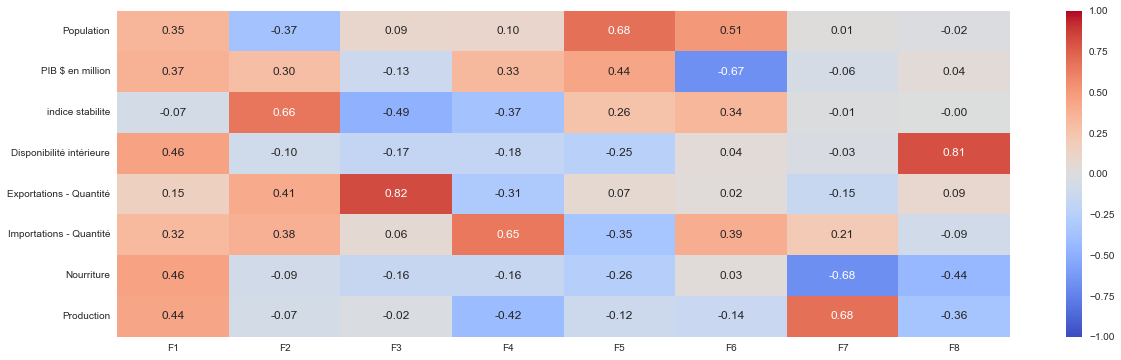

In [24]:
#Heatmap 
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Grâce à la heatmap on visualise bien que la majorité de nos variables initiales sont concentrées sur F1 et F2 

# Cercle de corrélation

### Nous allons utiliser les 2 premières composantes F1 et F2

In [25]:
#Définition des axes x et y. 
#Comme - en code - on commence à compter à partir de 0, cela nous donne :

x_y = (0,1)
x_y

(0, 1)

In [26]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(12, 12))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

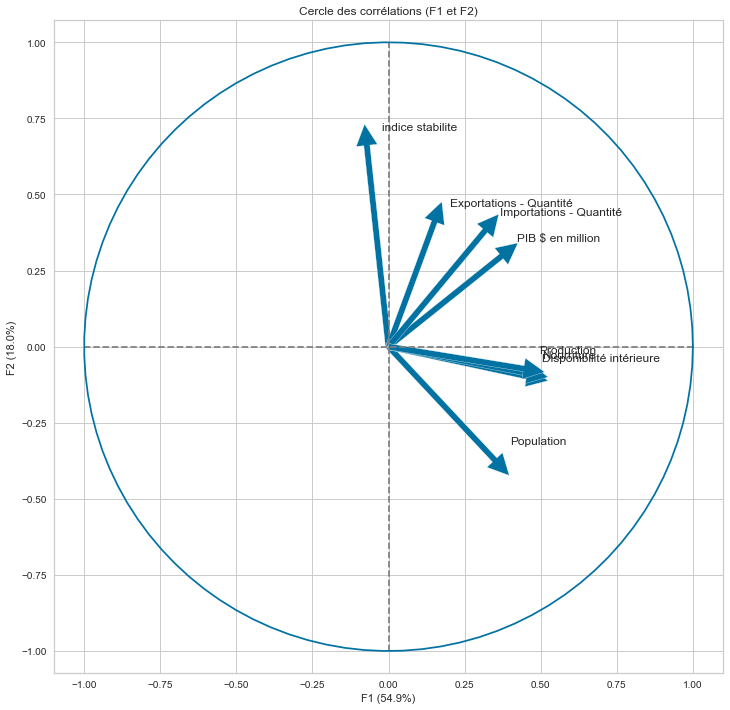

In [27]:
# Cercle de corrélation des 2 premières composantes F1 et F2
correlation_graph(pca, (0,1), features)

On remarque que les variables 'production, disponibilité intérieure & nourriture' sont très corrélées

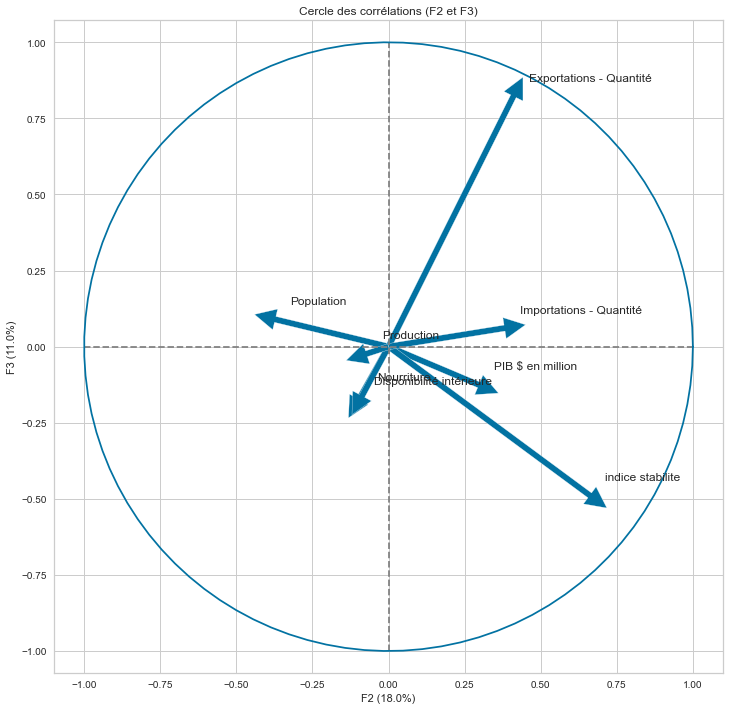

In [28]:
#Affichage du cercle de corrélation
correlation_graph(pca, (1,2), features)

Les plans F1 et F2 sont plus intéressants car ils cumulent 73% de l'information

## Projection

On veut visualiser des individus sur le nouvel espace en deux dimensions

In [29]:
#Calcul les données initiales sur les deux axes 
X_projected = pca.transform(X_scaled)
X_projected

array([[-0.52443739, -2.09764688,  1.93354637, ..., -0.68424111,
        -0.06170953,  0.04952418],
       [ 4.11553535, -0.14761167, -0.63620531, ...,  1.04481965,
         0.00431178, -0.01274685],
       [-1.18917021,  0.24967561, -0.46435425, ...,  0.09118455,
         0.00864996, -0.01445556],
       ...,
       [-0.28388934, -2.38904663,  1.29679851, ..., -0.76946105,
         0.05401217, -0.01015627],
       [-1.0463723 , -0.10083673, -0.32247352, ...,  0.10635914,
         0.00718862, -0.01623173],
       [-0.87327458, -0.41952344,  0.73885944, ..., -0.24184679,
        -0.09311963,  0.05644314]])

In [30]:
#pour rappel
x_y

(0, 1)

In [31]:
# Projection des individus sur les nouveaux axes 
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[12,12], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (20,20)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    
    plt.show()

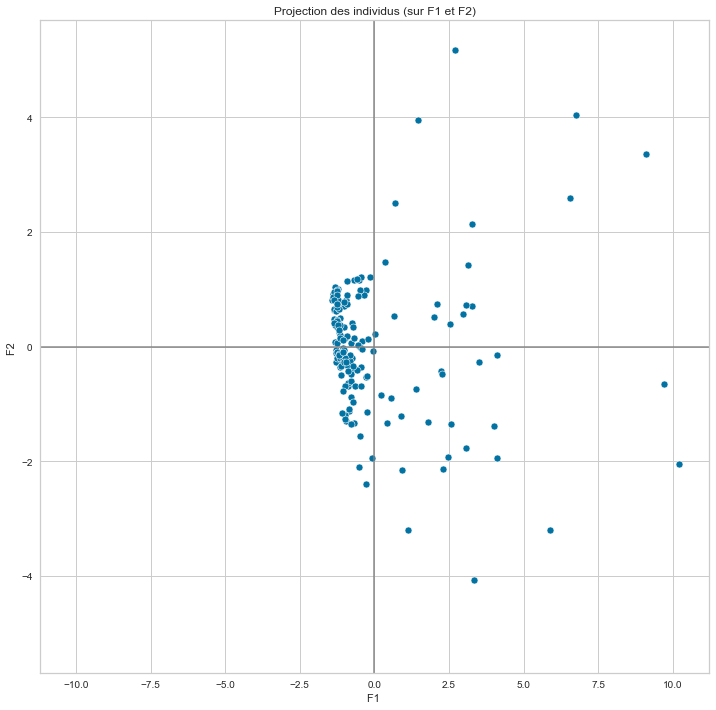

In [32]:
x_y = [0,1]
display_factorial_planes(X_projected, x_y)


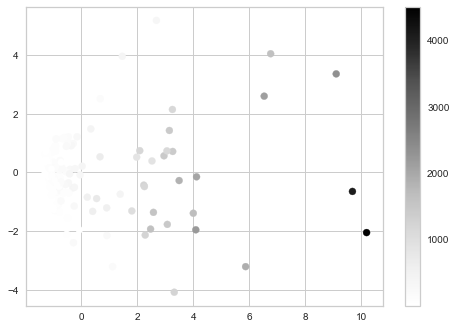

In [33]:
#Les plus gros consommateurs de volailles 
plt.scatter(X_projected[:,0],X_projected[:,1],
           c=df_final.get('Nourriture'))
plt.colorbar()

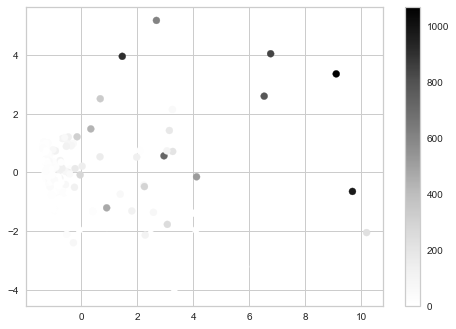

In [34]:
#Les plus gros consommateurs de volailles 

plt.scatter(X_projected[:,0],X_projected[:,1],
           c=df_final.get('Importations - Quantité'))
plt.colorbar()

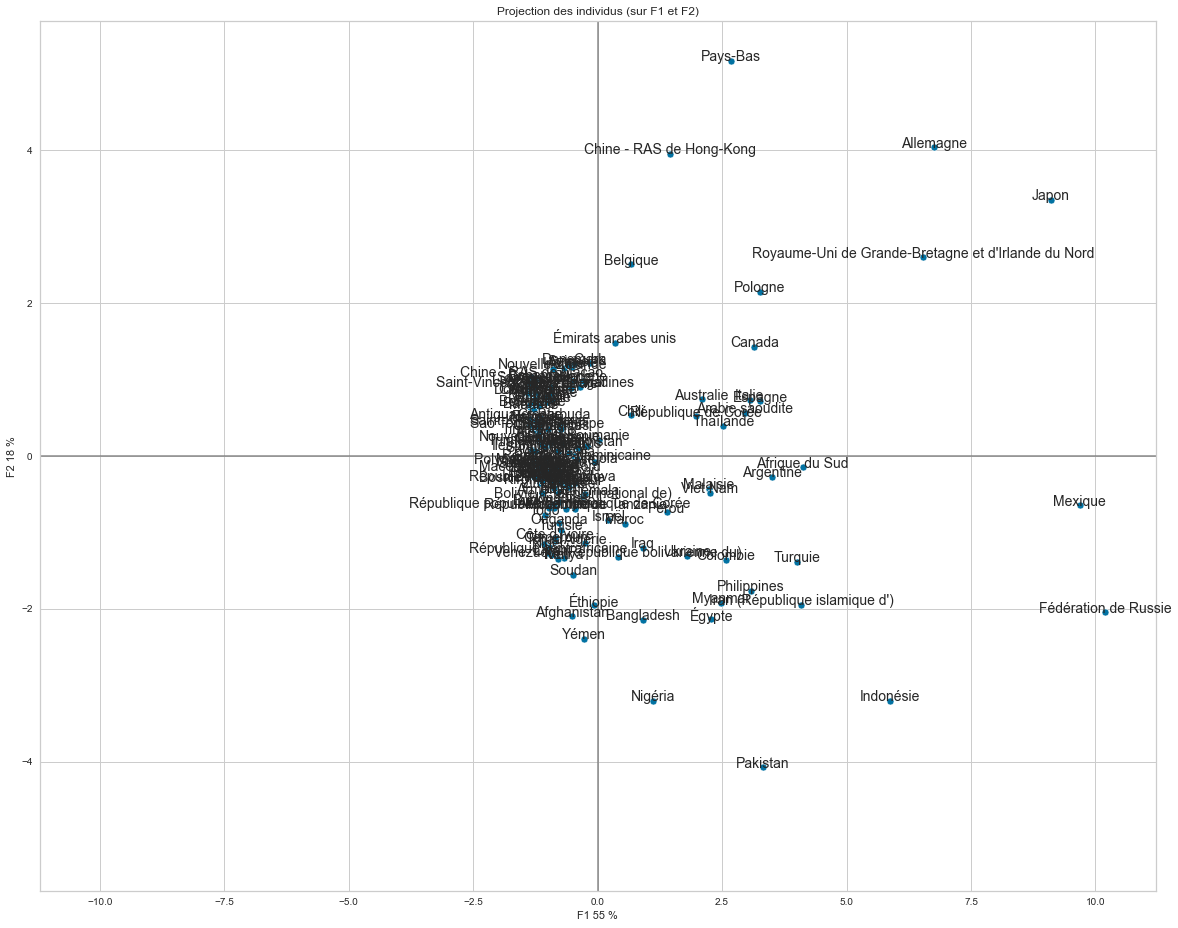

In [35]:
#Affichage des noms des pays et du pourcentage que capte chaque composante
x_y = [0,1]
display_factorial_planes(X_projected, x_y, pca, labels=pays, figsize=(20,16), marker="o")

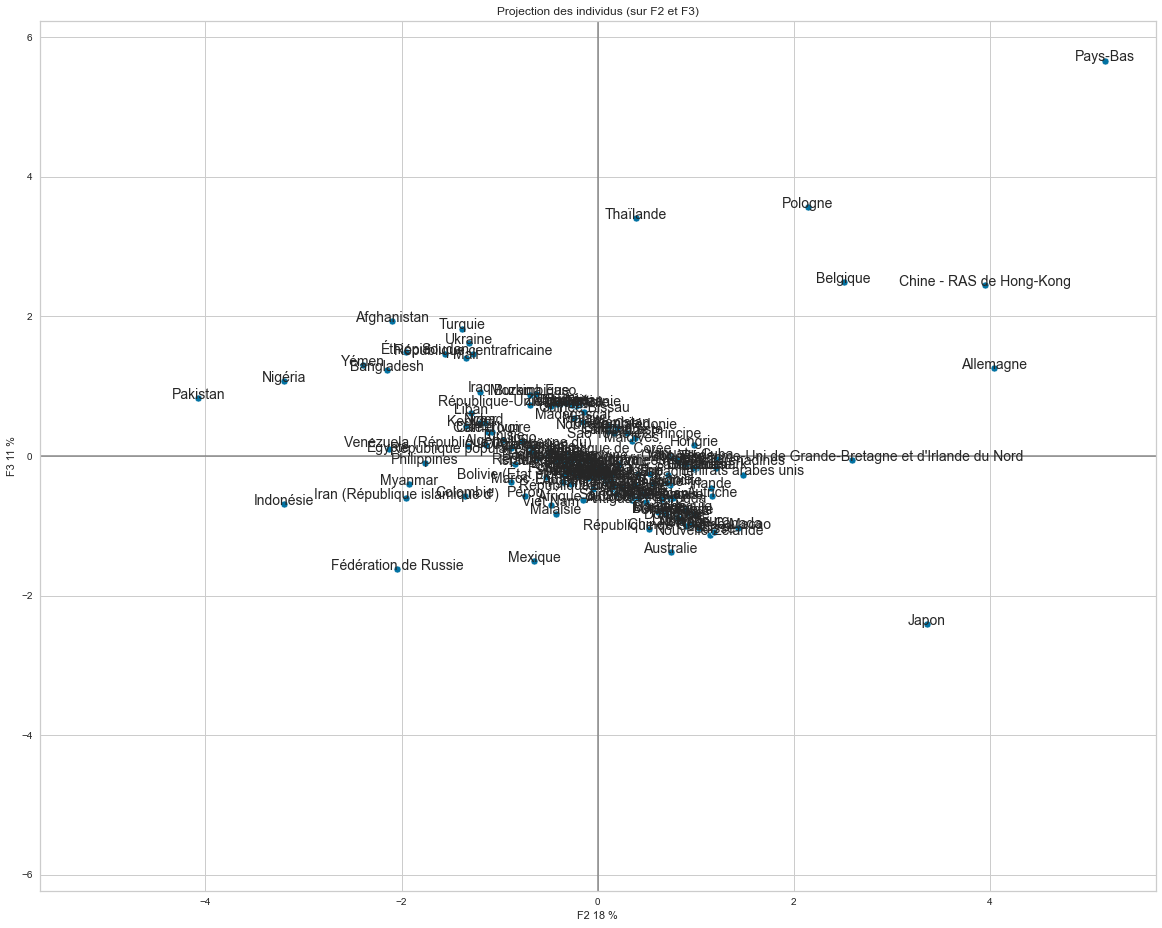

In [36]:
x_y = [1,2]
display_factorial_planes(X_projected, x_y, pca, labels=pays, figsize=(20,16),marker="o")

Avec les nouveaux axes F1 et F2 qui cumulent 73% de 'linformation, les pays ciblent se situent dans la partie en haut à droite du graphique car ce sont de gros importateurs et consommateurs de viande de volaille 

F1 serait la variable synthétique qui representerait la consommation de viande de volaille 
F2 representerait l'importation de volailles

# Clustering 

## Elbow method : détermination du nombre de clusters

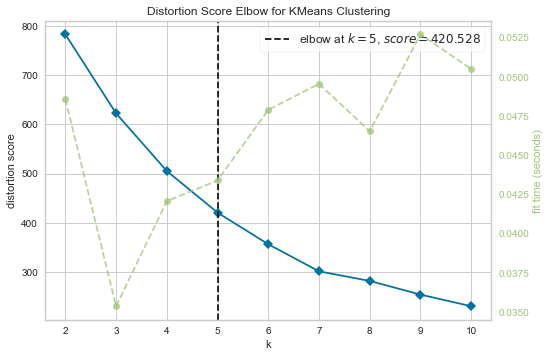

In [37]:
#On initialise notre modèle pour afficher la méthode du coude qui permet de trouver le nombre de clusters optimal

Model=KMeans()
Visualizer = KElbowVisualizer(Model, K=(1, 10))

Visualizer.fit(X_scaled)
Visualizer.show()
plt.show()



Nous avons 5 groupes de pays qui ont un comportement similaires et qu'on regroupera en clusters

In [38]:
#Projection de clusters

pca = decomposition.PCA (n_components = 8)


#On fit 
pca.fit(X_scaled)

#Creation d'une nouvelle variable y_projected

y_projected = pca.transform(X_scaled)

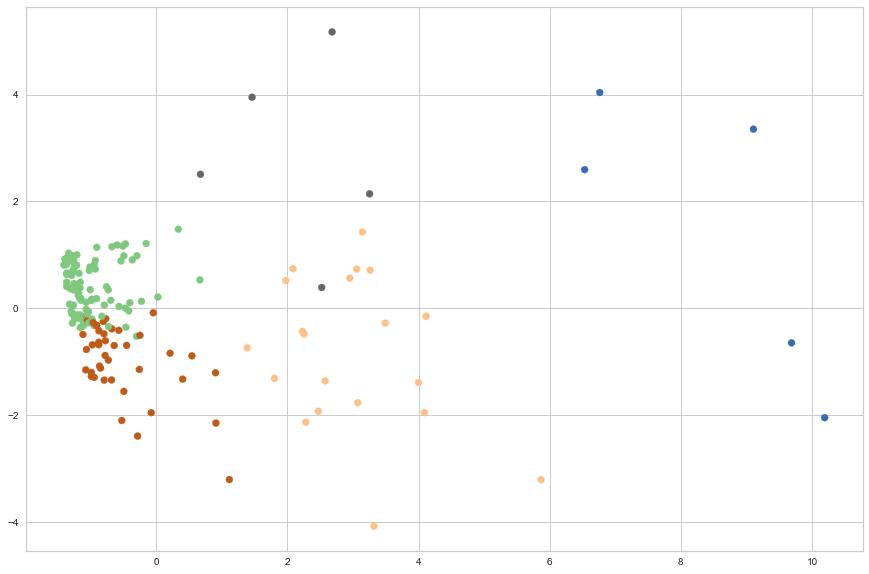

In [39]:
#Instanciation du modèle

model=KMeans(n_clusters = 5, random_state = 3)

#on entraine le model sur y
model.fit(X_scaled)

#Creation de la variable cluster

cluster = model.labels_

#Visualisation sur un graphique
plt.figure(figsize =(15,10))
plt.scatter(y_projected [:,0], y_projected [:,1], c = model.labels_ , cmap = "Accent")
plt.show()

In [40]:
#Coordonnées des centroïds
model.cluster_centers_

array([[-0.46568022, -0.28460639,  0.56155432, -0.4076336 , -0.23726558,
        -0.24002268, -0.40183454, -0.41567511],
       [ 1.26897746,  0.75845081, -0.45599949,  1.58831152,  0.01170838,
         0.31739249,  1.51179067,  1.5780039 ],
       [ 2.14049061,  4.25132903,  0.22008833,  3.6905489 ,  0.81758341,
         3.76062868,  3.75092663,  3.24675693],
       [ 0.14751957, -0.30004971, -1.09952441, -0.33192911, -0.13798959,
        -0.26497001, -0.32357724, -0.35359151],
       [ 0.11295122,  0.47204282,  0.50731518,  0.2448678 ,  4.6603822 ,
         1.61196674,  0.31371495,  1.05981821]])

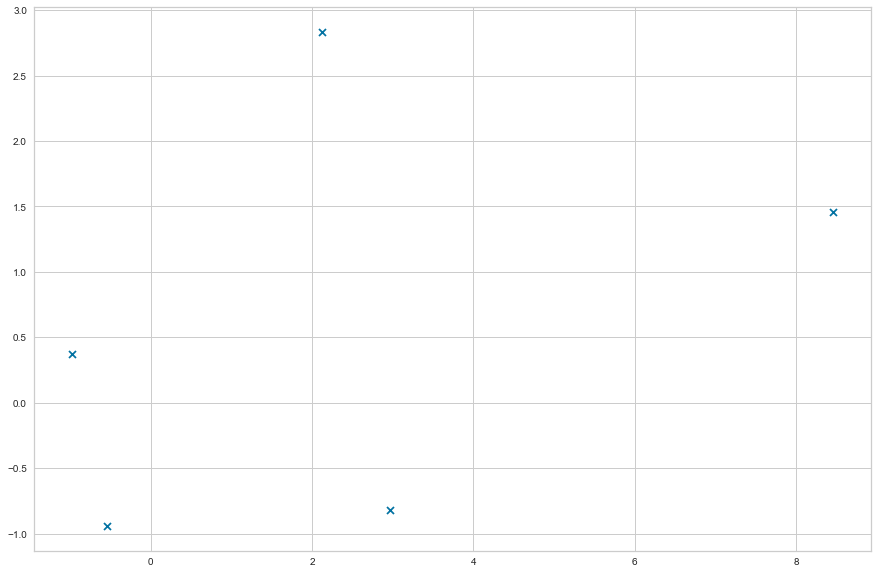

In [41]:
# Détermination des centroids

centroid = model.cluster_centers_ 
centroid_projected = pca.transform(centroid)

plt.figure(figsize =(15,10))
plt.scatter(centroid_projected [:,0], centroid_projected [:,1], marker='x')
plt.show()

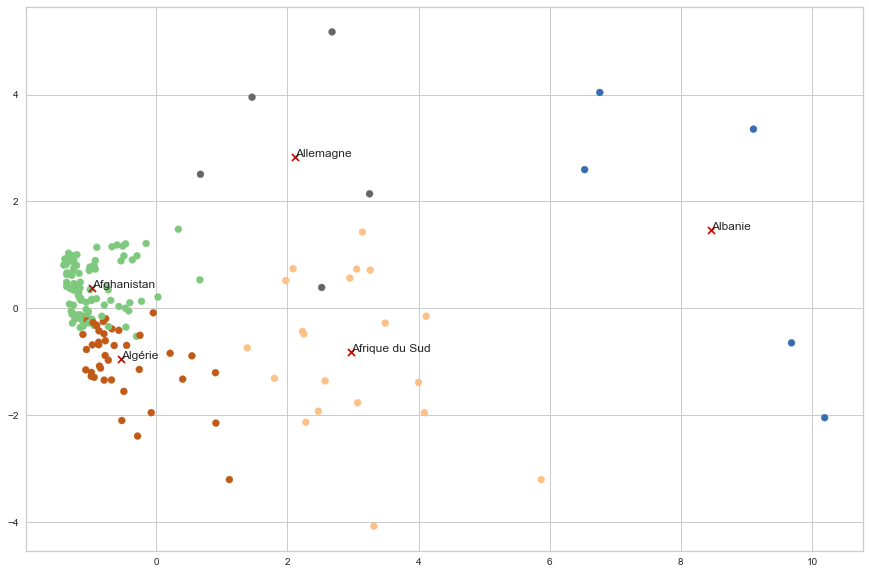

In [42]:
#Affichage des centroids de nos 5 clusters

plt.figure(figsize =(15,10))
plt.scatter(y_projected [:,0], y_projected [:,1], c = model.labels_, cmap = "Accent")

plt.scatter(centroid_projected [:,0], centroid_projected [:,1], marker='x', c="r")

#Affichage du représentant de chaque cluster (nom de l'individu charactéristique du groupe) 
for i,(x,y) in enumerate (zip(centroid_projected [:,0]
                              , centroid_projected [:,1])):
    plt.text(x,y,df_final.index[i])

plt.show()

Affichage des centroids et du nom du pays représentatif du cluster. Les pays des clusters auront un comportement similaire que le centroid qui appartient au cluster correspondant.

## Dendogramme

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [44]:
#pour rappel y= X_scaled 
# Méthode du CAH Classification ascendante hiérarchique
Z = linkage(X_scaled, method="ward")
display(Z[:10])

array([[5.80000000e+01, 1.31000000e+02, 2.88099879e-02, 2.00000000e+00],
       [1.00000000e+02, 1.20000000e+02, 4.21195199e-02, 2.00000000e+00],
       [8.00000000e+01, 1.33000000e+02, 4.64828762e-02, 2.00000000e+00],
       [4.70000000e+01, 1.03000000e+02, 6.20988312e-02, 2.00000000e+00],
       [5.40000000e+01, 1.09000000e+02, 6.39752900e-02, 2.00000000e+00],
       [5.50000000e+01, 8.50000000e+01, 6.63829341e-02, 2.00000000e+00],
       [2.70000000e+01, 3.60000000e+01, 6.73534178e-02, 2.00000000e+00],
       [5.10000000e+01, 1.32000000e+02, 6.84162340e-02, 2.00000000e+00],
       [4.10000000e+01, 9.40000000e+01, 6.88415085e-02, 2.00000000e+00],
       [2.50000000e+01, 9.90000000e+01, 7.09934687e-02, 2.00000000e+00]])

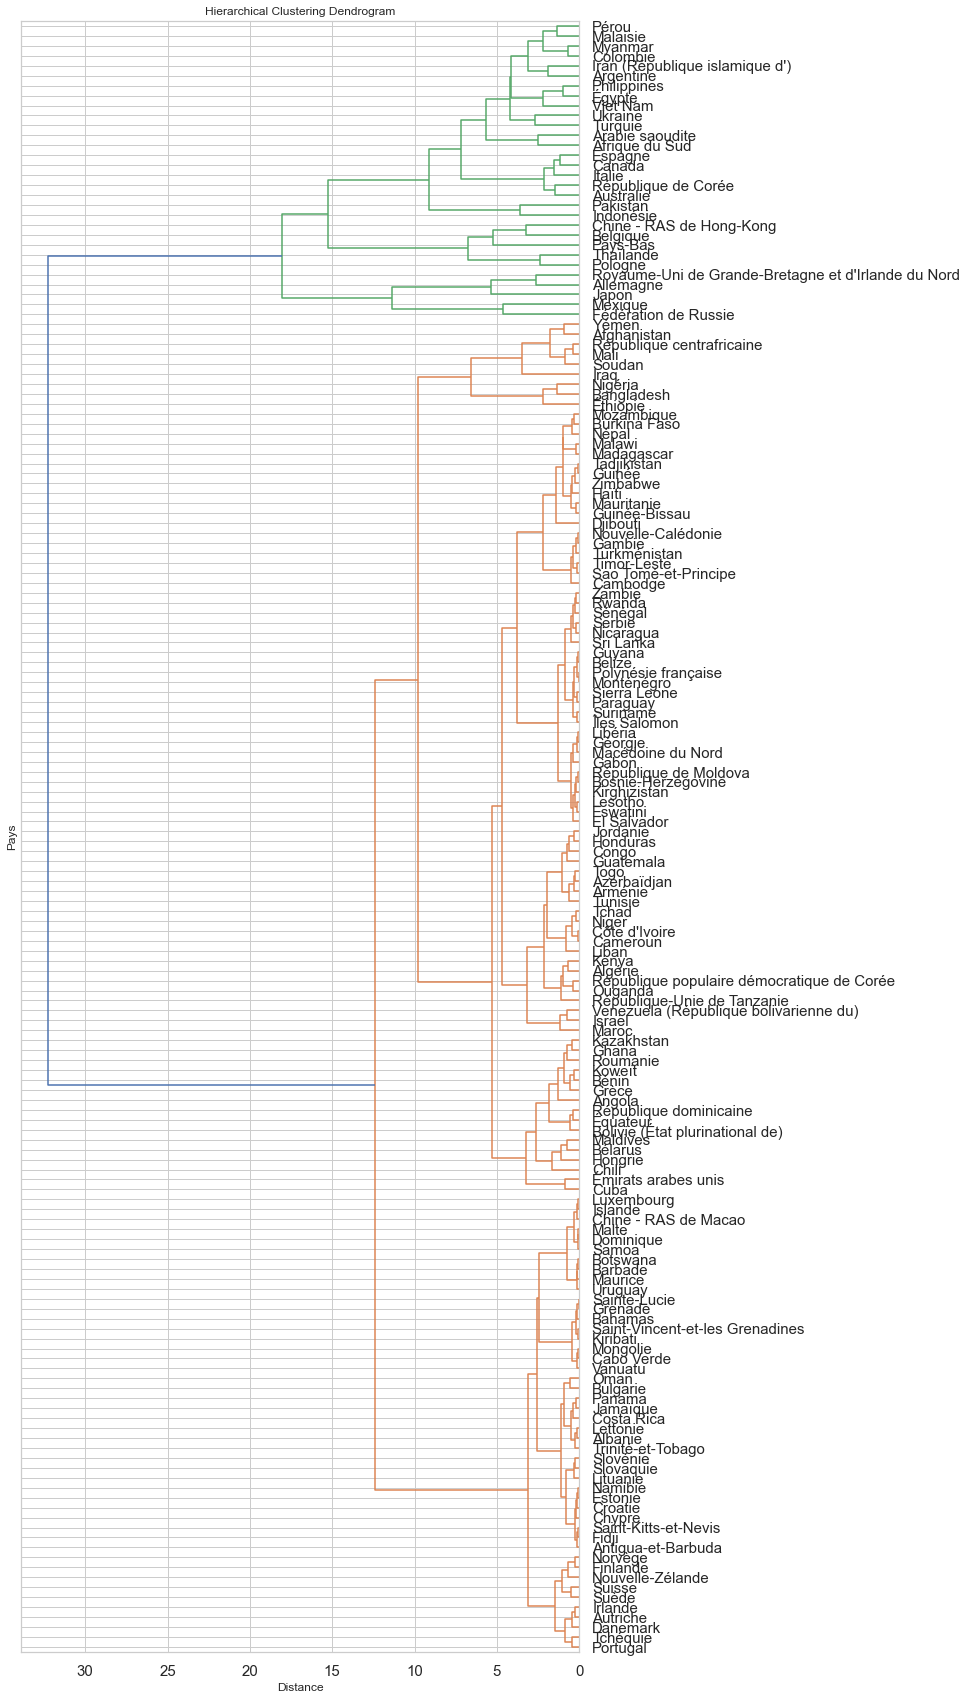

In [63]:
#Dendogramme
fig, ax = plt.subplots(1, 1, figsize=(10,30))

_ = dendrogram(Z, ax=ax, labels=pays, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

## Clusters

In [46]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')

#index triés des groupes
index_de_groupe = np.argsort(groupes_cah)

#Affichage des pays selon leurs groupes
df = pd.DataFrame(df_final.index[index_de_groupe], groupes_cah[index_de_groupe]).reset_index()
df_cluster = df.rename(columns={'index':'Cluster'})
display(df_cluster.head(10))


,Cluster,Zone
0,1,Lituanie
1,1,Grenade
2,1,Irlande
3,1,Chine - RAS de Macao
4,1,Chypre
5,1,Mongolie
6,1,Samoa
7,1,Costa Rica
8,1,Saint-Vincent-et-les Grenadines
9,1,Croatie


In [47]:
#Le nombre de pays de nos clusters est calculé par value_counts
df_cluster['Cluster'].value_counts()

2    88
1    46
5    20
3     5
4     5
Name: Cluster, dtype: int64

In [48]:
groupes_cah

array([2, 5, 1, 2, 3, 2, 1, 5, 5, 2, 5, 1, 2, 1, 2, 1, 2, 4, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 5, 2, 4, 1, 1, 5, 2, 1, 2, 1, 2, 1, 2, 1, 5, 2,
       2, 2, 5, 1, 2, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 5, 2, 1, 1, 2, 5, 1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 2, 5, 2, 2, 2, 1, 2, 1, 2, 3, 1, 2, 2, 5, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 5, 1, 2, 4, 5, 5, 4, 2, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 4, 2, 2, 1, 2,
       2, 5, 5, 1, 1, 2, 5, 2, 2, 2], dtype=int32)

In [49]:
df_scaled = pd.DataFrame(X_scaled, columns=df_final.columns, index=pays)
df_scaled

,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,,,
Afghanistan,0.31,-0.38,-3.02,-0.47,0.29,-0.31,-0.46,-0.51
Afrique du Sud,0.83,0.17,-0.23,2.41,-0.11,2.33,2.44,1.84
Albanie,-0.53,-0.39,0.50,-0.48,-0.46,-0.26,-0.47,-0.53
Algérie,0.43,-0.13,-0.94,-0.16,-0.46,-0.45,-0.16,-0.16
Allemagne,1.47,5.71,0.73,1.88,3.17,4.11,1.81,1.62
...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),0.13,0.00,-1.33,0.33,-0.46,-0.33,0.33,0.31
Viet Nam,1.77,-0.04,0.33,1.14,-0.46,1.12,1.16,0.77
Yémen,0.09,-0.38,-3.17,-0.21,-0.46,-0.04,-0.20,-0.31


In [50]:
#Jointure pour inclure la colonne cluster aux données 

df_final_cluster = pd.merge(df_cluster, df_scaled, on='Zone' )

df_final_cluster

,Cluster,Zone,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,1,Lituanie,-0.53,-0.33,0.94,-0.43,-0.08,-0.22,-0.43,-0.38
1,1,Grenade,-0.60,-0.41,1.19,-0.54,0.29,-0.42,-0.54,-0.55
2,1,Irlande,-0.48,0.15,1.18,-0.37,0.06,0.07,-0.36,-0.39
3,1,Chine - RAS de Macao,-0.59,-0.33,1.66,-0.52,-0.46,-0.34,-0.51,-0.55
4,1,Chypre,-0.57,-0.37,0.67,-0.50,-0.46,-0.39,-0.50,-0.52
...,...,...,...,...,...,...,...,...,...,...
159,5,République de Corée,0.68,2.28,0.51,0.64,-0.43,0.28,0.71,0.65
160,5,Philippines,2.03,0.13,-1.24,1.58,-0.45,0.89,1.59,1.27
161,5,Pérou,0.18,-0.06,-0.21,1.58,-0.46,-0.14,0.08,1.55
162,5,Australie,0.01,1.94,1.07,1.09,-0.23,-0.38,1.17,1.27


In [51]:
#On group by cluster par la moyenne
moy_cluster=df_final_cluster.groupby(['Cluster']).mean()
moy_cluster

,Population,PIB $ en million,indice stabilite,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Cluster,,,,,,,,
1,-0.53,-0.25,1.05,-0.45,-0.25,-0.29,-0.44,-0.46
2,-0.14,-0.31,-0.49,-0.35,-0.19,-0.23,-0.34,-0.36
3,2.14,4.25,0.22,3.69,0.82,3.76,3.75,3.25
4,0.11,0.47,0.51,0.24,4.66,1.61,0.31,1.06
5,1.27,0.76,-0.46,1.59,0.01,0.32,1.51,1.58


### Analyse de la pertinence des clusters

### Table de contingence

In [52]:
#Table de contingence
crosstab = pd.crosstab(pays, groupes_cah, dropna=False)
crosstab.rename_axis(columns="cluster", index="pays", inplace=True)
crosstab

cluster,1,2,3,4,5
pays,,,,,
Afghanistan,0,1,0,0,0
Afrique du Sud,0,0,0,0,1
Albanie,1,0,0,0,0
Algérie,0,1,0,0,0
Allemagne,0,0,1,0,0
...,...,...,...,...,...
Égypte,0,0,0,0,1
Émirats arabes unis,0,1,0,0,0
Équateur,0,1,0,0,0


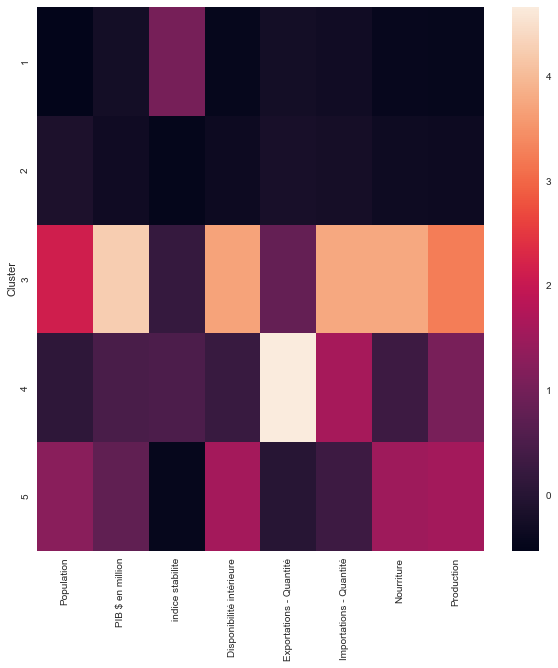

In [53]:
#Heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(moy_cluster)
plt.show()

Le cluster 3 se dégage des autres clusters

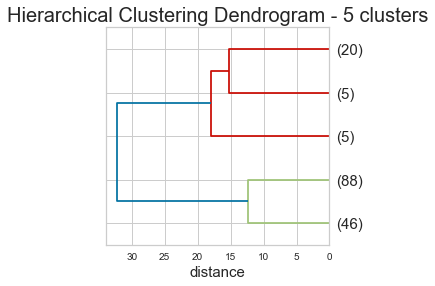

In [54]:
#Création de 5 clusters dans un premier temps
fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = df_final.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [55]:
# Visualisation de la liste des pays clusters
print("Cluster 1\n")
print(df_final_cluster[df_final_cluster['Cluster'] == 1]['Zone'].unique())
print("Cluster 2")
print(df_final_cluster[df_final_cluster['Cluster'] == 2]['Zone'].unique())
print("Cluster 3")
print(df_final_cluster[df_final_cluster['Cluster'] == 3]['Zone'].unique())
print("Cluster 4")
print(df_final_cluster[df_final_cluster['Cluster'] == 4]['Zone'].unique())
print("Cluster 5")
print(df_final_cluster[df_final_cluster['Cluster'] == 5]['Zone'].unique())

Cluster 1

['Lituanie' 'Grenade' 'Irlande' 'Chine - RAS de Macao' 'Chypre' 'Mongolie'
 'Samoa' 'Costa Rica' 'Saint-Vincent-et-les Grenadines' 'Croatie'
 'Saint-Kitts-et-Nevis' 'Slovaquie' 'Danemark' 'Dominique' 'Luxembourg'
 'Namibie' 'Estonie' 'Portugal' 'Fidji' 'Finlande' 'Norvège' 'Panama'
 'Oman' 'Sainte-Lucie' 'Slovénie' 'Islande' 'Maurice' 'Lettonie' 'Albanie'
 'Vanuatu' 'Uruguay' 'Antigua-et-Barbuda' 'Kiribati' 'Cabo Verde'
 'Autriche' 'Bahamas' 'Tchéquie' 'Trinité-et-Tobago' 'Nouvelle-Zélande'
 'Bulgarie' 'Malte' 'Suisse' 'Botswana' 'Jamaïque' 'Barbade' 'Suède']
Cluster 2
['Nouvelle-Calédonie' 'Mauritanie' 'Macédoine du Nord' 'Nigéria' 'Mali'
 'Madagascar' 'Népal' 'Mozambique' 'Monténégro' 'Maroc' 'Malawi'
 'Maldives' 'Niger' 'Nicaragua' 'Afghanistan' 'Paraguay' 'Yémen'
 'Venezuela (République bolivarienne du)' 'Turkménistan' 'Tunisie' 'Togo'
 'Timor-Leste' 'Tchad' 'Tadjikistan' 'Suriname' 'Sri Lanka' 'Ouganda'
 'Soudan' 'Serbie' 'Sénégal' 'Sao Tomé-et-Principe' 'Roumanie'
 'Ré

<AxesSubplot:xlabel='Cluster', ylabel='Disponibilité intérieure'>

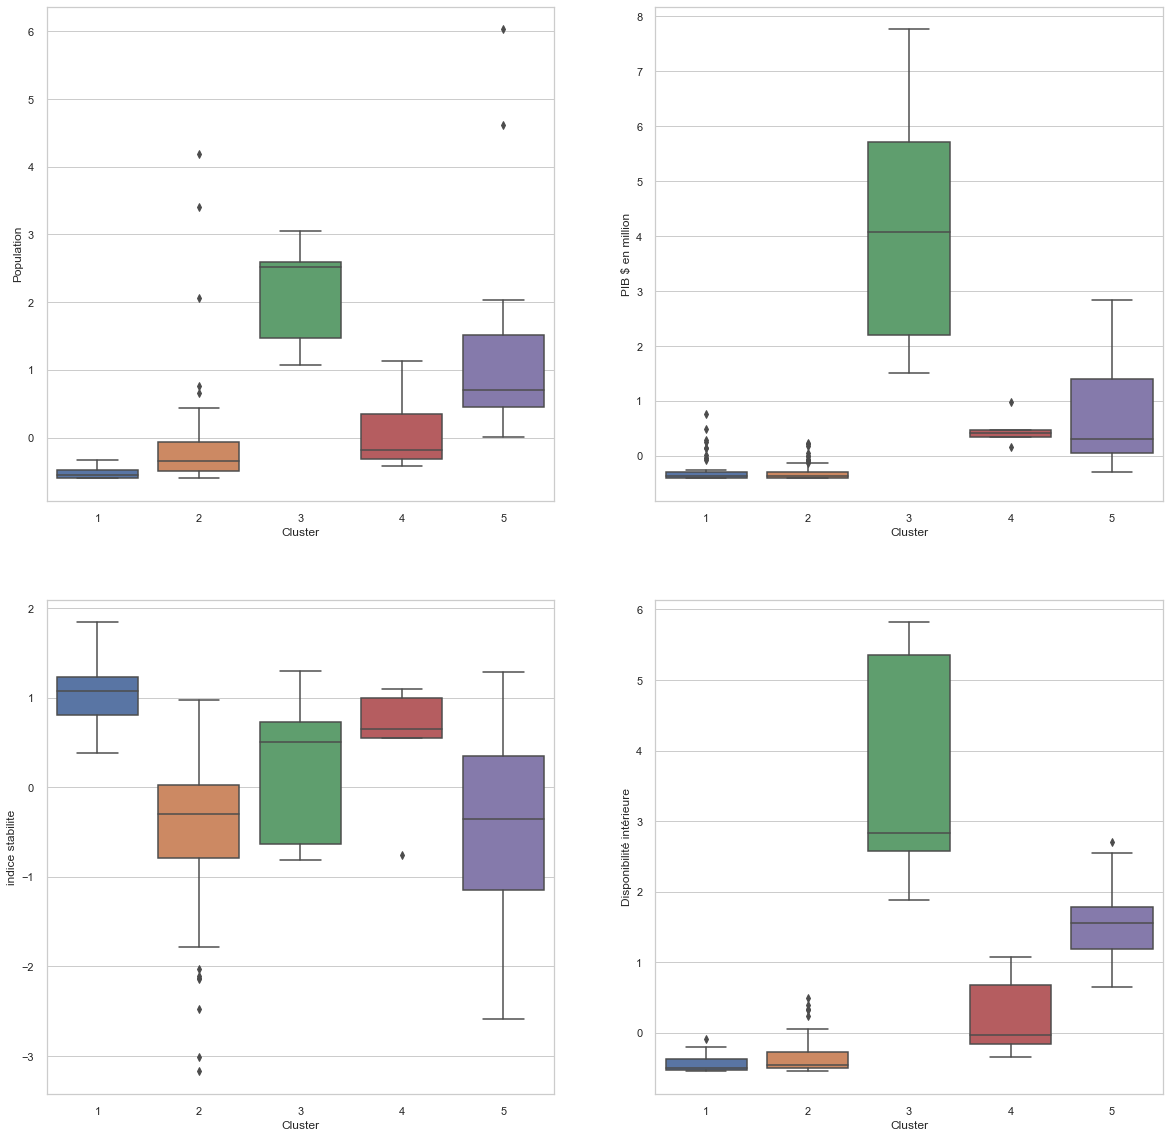

In [56]:
#Comparaison visuelle des groupes par Boxplot
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_final_cluster, x='Cluster', y='Population')
plt.subplot(222)
sns.boxplot(data=df_final_cluster, x='Cluster', y='PIB $ en million')
plt.subplot(223)
sns.boxplot(data=df_final_cluster, x='Cluster', y='indice stabilite')
plt.subplot(224)
sns.boxplot(data=df_final_cluster, x='Cluster', y='Disponibilité intérieure')

<AxesSubplot:xlabel='Cluster', ylabel='Production'>

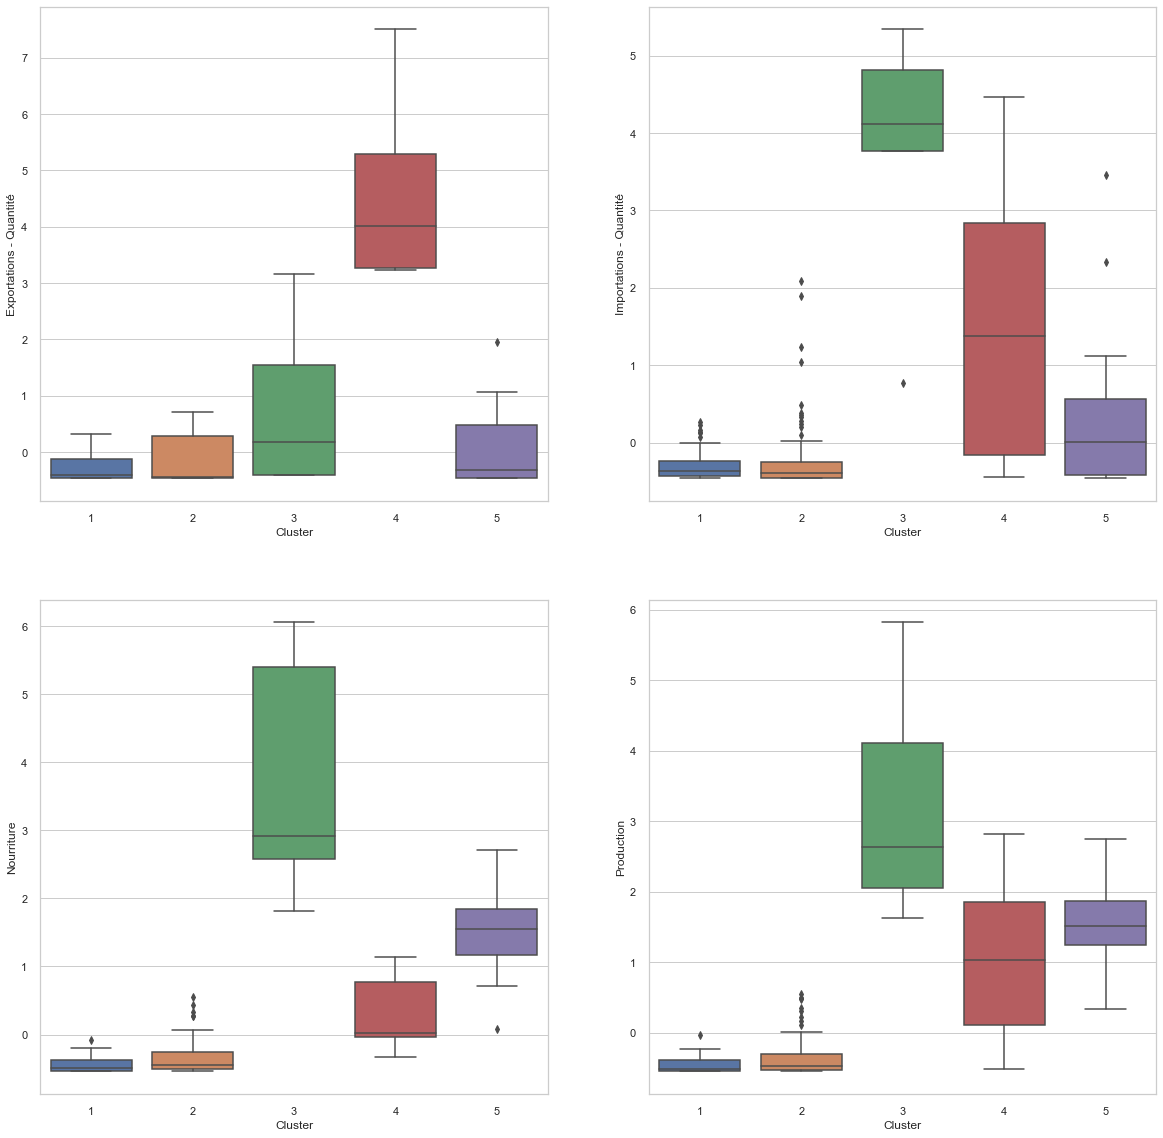

In [57]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_final_cluster, x='Cluster', y='Exportations - Quantité')
plt.subplot(222)
sns.boxplot(data=df_final_cluster, x='Cluster', y='Importations - Quantité')
plt.subplot(223)
sns.boxplot(data=df_final_cluster, x='Cluster', y='Nourriture')
plt.subplot(224)
sns.boxplot(data=df_final_cluster, x='Cluster', y='Production')

In [58]:
# Visualisation de la liste des pays clusters
Cluster3 = df_final_cluster[df_final_cluster['Cluster'] == 3]['Zone'].unique()
display(Cluster3)
print("Le cluster 3 affiche les meilleures performances donc notre choix se portera sur le cluster 3")

array(['Mexique', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Fédération de Russie', 'Allemagne', 'Japon'], dtype=object)

Le cluster 3 affiche les meilleures performances donc notre choix se portera sur le cluster 3


Nous sélectionnons le cluster 3 en tant que cluster cible qui comprend les pays  :
- Mexique
- Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
- Fédération de Russie
- Allemagne
- Japon